In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import copy as cp

from rayopt import *
from rayopt import zemax

np.set_printoptions(precision=3)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
d = requests.get("http://www.lens-designs.com/MicroscopeObjectives/US07502177-1.zmx")
d.encoding = "utf-16"

/home/rj/work/nist/pyrayopt/rayopt/elements.py:126: RuntimeWarning: invalid value encountered in multiply
  self._offset = o = d*u
/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:241: RuntimeWarning: divide by zero encountered in true_divide
  return self.n.take((0, -2))/(2*na)
/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:246: RuntimeWarning: divide by zero encountered in true_divide
  return 1.22*self.l/(2*na)/self.system.scale
/home/rj/work/nist/pyrayopt/rayopt/elements.py:199: RuntimeWarning: invalid value encountered in less_equal
  good = np.square(y[:, :2]).sum(1) <= self.radius**2
/home/rj/work/nist/pyrayopt/rayopt/analysis.py:408: RuntimeWarning: divide by zero encountered in true_divide
  xd = (a[1] - h)/h
/usr/lib/python3/dist-packages/matplotlib/collections.py:631: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


OBSC not handled 0 3.0 0
OBSC not handled 0 3.0 0
RAID not handled 32 1 0 7.0E-1 0 0 0 0 0 0
System: 
Scale: 1.0 mm
Wavelengths: 193, 194, 192 nm
Object:
 Index: 1
 Entrance: 14.2 dia at 20
 Pupil: 14.2 dia at 20
 Semi-Angle: 1.75
Image:
 Index: 1
 Entrance: 20 dia at 8.24
 Pupil: 4.73e+03 dia at 3.12e+03
 Radius: 0.286
 NA: 0.604
Stop: 1
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf     14.204         basic/air   1.000   1.000   89.30
 1 S         20        inf     14.204         basic/air   1.000   1.000   89.30
 2 S     15.189     -81.63         18  HERAEUS/SUPRASIL   1.561   1.458   67.88
 3 S        3.5     -18.04         18         basic/air   1.000   1.000   89.30
 4 S     22.449      18.74          8  HERAEUS/SUPRASIL   1.561   1.458   67.88
 5 S          2      795.1          8         basic/air   1.000   1.000   89.30
 6 S     1.9981         85          6  HERAEUS/SUPRASIL   1.561   1.458   67.88
 7 S     

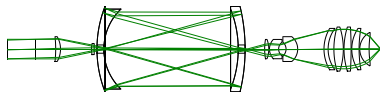

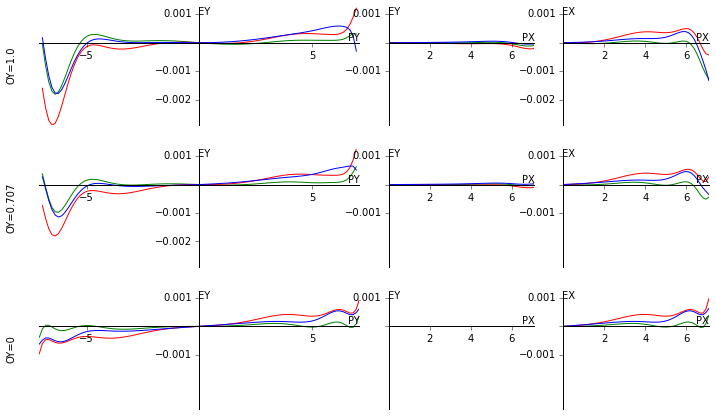

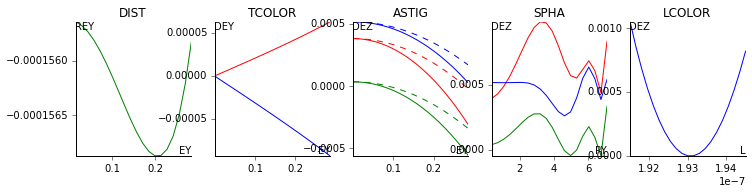

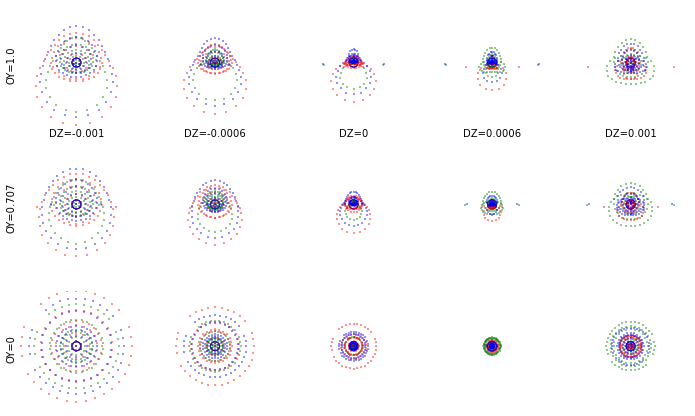

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


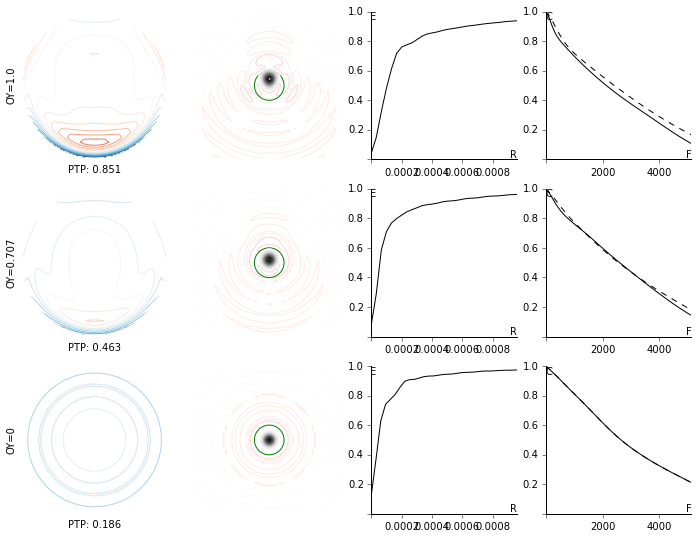

In [19]:
s = zemax.zmx_to_system(d.text)
s.object = InfiniteConjugate(angle=np.deg2rad(3.5/2))
s.wavelengths = 193e-9, 194e-9, 192e-9
s.stop = 1
del s[0]
s[0].radius = s[1].radius
s[1].distance = 20.
fsm = cp.copy(s[2].material)
fsm.mirror = True
for e in s[10:13]:
    e.curvature *= -1
for e in s:
    if getattr(e.material, "mirror", None):
        e.material = fsm
s.update()
a = Analysis(s, resize=False)

In [22]:
print(system_to_yaml(s))

elements:
- {material: basic/air, radius: 7.101937623607}
- {distance: 20.0, material: basic/air, radius: 7.101937623607}
- {curvature: -0.012250712097142069, distance: 15.188841, material: HERAEUS/SUPRASIL,
  radius: 9.0}
- {curvature: -0.05543026775313687, distance: 3.5, material: basic/air, radius: 9.0}
- {curvature: 0.05334878314093095, distance: 22.449116, material: HERAEUS/SUPRASIL,
  radius: 4.0}
- {curvature: 0.0012576439726421588, distance: 2.0, material: basic/air, radius: 4.0}
- {curvature: 0.011765167907417353, distance: 1.998104, material: HERAEUS/SUPRASIL,
  radius: 3.0}
- {curvature: 0.024812404574593556, distance: 5.0, material: basic/air, radius: 3.0}
- {curvature: -0.012727913010722148, distance: 97.532362, material: HERAEUS/SUPRASIL,
  radius: 29.0}
- {curvature: -0.00756944706536549, distance: 5.0, material: HERAEUS/SUPRASIL, radius: 31.0}
- curvature: 0.012727913010722148
  direction: [-0.0, -0.0, -1.0]
  distance: 5.0
  material: basic/air
  radius: 29.0
- curvatu